<a href="https://colab.research.google.com/github/rebeko14/Oppgaver/blob/main/Bildesegmentering_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oppgave: Bildesegmentering

I denne oppgaven skal vi bruke **K-Means clustering**, som er en såkalt ikke-veiledet maskinlæringsmetode for å segmentere et bilde ved å gruppere pikslene i klynger med lignende farger.

**Instruksjoner:**

1. Last gjerne ned følgende bilde til å begynne med: https://github.com/rebeko14/Oppgaver/blob/main/Bildesegmentering%20eksempelbilde.PNG  
2. Kjør cellene nedenfor for å se resultatet av segmenteringen av dette bildet(i første celle skal du laste opp bildet du lastet ned i steg 1).
3. Gjør deretter oppgavene nederst på denne siden.

Lenke til notebooken i Google Colab: https://colab.research.google.com/drive/1DyJXj2fGRvneuXhi_-9K1cIaZdrBtZ6h?usp=sharing

In [ ]:
# Last opp bilde fra egen datamaskin
from google.colab import files
uploaded = files.upload()

# Få navnet på opplastet fil
filename = next(iter(uploaded))
print(f"Du lastet opp filen: {filename}")

Saving Bildesegmentering eksempelbilde.PNG to Bildesegmentering eksempelbilde.PNG
Du lastet opp filen: Bildesegmentering eksempelbilde.PNG


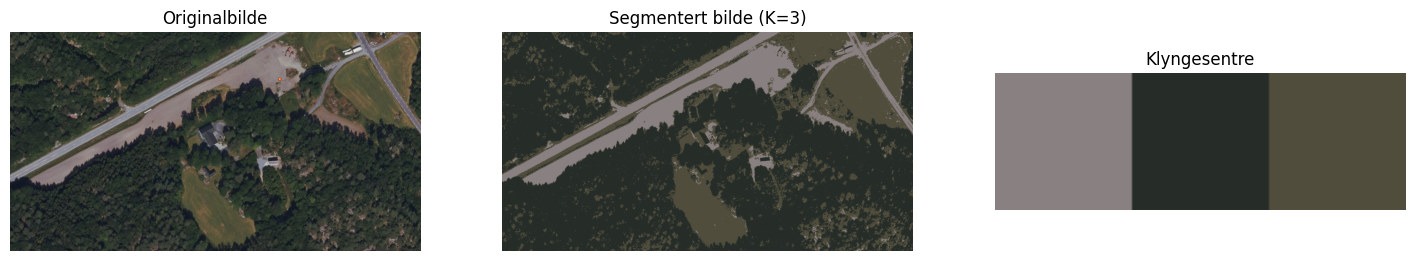

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

# Steg 1: Les inn det opplastede bildet
image = io.imread(filename)

# Steg 2: Forbered bildet for K-Means
rows, cols, channels = image.shape
pixels = image.reshape(rows * cols, channels)

# Steg 3: Bruk K-Means clustering
k = 3  # Du kan endre denne verdien for å se effektene det har på bildet
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

# Steg 4: Gjenskap det segmenterte bildet
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(rows, cols, channels).astype(np.uint8)

# Steg 5: Vis originalbildet, segmentert bilde og klyngesentre
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(image)
ax[0].set_title('Originalbilde')
ax[0].axis('off')

ax[1].imshow(segmented_img)
ax[1].set_title(f'Segmentert bilde (K={k})')
ax[1].axis('off')

# Visualiser klyngesentrene
cluster_centers_img = np.zeros((50, 50 * k, channels), dtype=np.uint8)
for i, color in enumerate(kmeans.cluster_centers_.astype(np.uint8)):
    cluster_centers_img[:, i*50:(i+1)*50] = color

ax[2].imshow(cluster_centers_img)
ax[2].set_title('Klyngesentre')
ax[2].axis('off')

plt.show()

## Oppgaver:

- **Test med ulike bilder**: Last opp flere forskjellige bilder. Ta gjerne utklipp fra norgeibilder.no eller Google maps (bruk satellittvisning).
- **Endre antall klynger (verdien k i scriptet)**: Forsøk med ulike verdier (for eksempel k=1, k=5, k=10). Hva skjer med segmenteringen?
- **Refleksjon**: Hva betyr egentlig klyngesentrene du ser?
